# Challenge 4: Preventing Melanomas

Challenge Statement: A cancer diagnosis is a significant moment for a patient and their support network. It often leads into a long period of treatment and support. Prevention and early detection play a big role in positive outcomes. How could we better track and support cancer patients through this journey?

Can we pre-emptively identify potential patients through target interviews and other ongoing, cancer detection programs?


## Supporting Mentors

Richard Trethick – Department of Health

## Potential Focus Questions

This is a complex Challenge and you may find it useful to consider the following questions when building out your prototype:

    - Can we use different data types to predict the prevalence of melanoma (coastal locations, UV irradiance, location to medical services etc.)?  

    - Can we help group cancer patients according to their cancer stage?  

    - Can we predict a cancer patient’s outcome according to their participating in interviews and programs?

## Critical Concepts

Emergency Departments and Hospitals are incredibly complex organisations. You may want to talk to your Challenge Mentors about the following ideas as you developing you prototype:

    - Melanoma progression and diagnostic approaches.  

    - Current thinking around melanoma causes and contributory factors.  

    - Melanoma treatment approaches.  

    - Melanoma prevention approaches.

## Supporting Data Sets

The Department of Health has produced a synthesised version of the WA Cancer Registry (WACR) to help resolve this Challenge. Since 1982, the Western Australian Cancer Registry has collected population-based incidence and mortality cancer data for use in the planning of health care services and the support of cancer monitoring, evaluation and research at local, national and international levels. The Registry included data points on:

    - Age
    - Nationality
    - Location of diagnosis
    - Type of diagnosis
    - Morphology
    - Melanoma specific details


## Potential Solution Pathways

You are free to resolve this Challenge by developing your prototype in whatever means you may like. Our mentors, partners and organising team have thought of the following techniques as being viable methods to resolve the Challenge:

    - Statistical models to measure melanoma occurrence.  

    - Spatial analysis of melanoma occurrence and other descriptors.  

    - Machine learning models predicting cancer prevalence and risk.



---
# Imports

In [1]:
# import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, to_tree, cut_tree
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.decomposition import PCA
from graphviz import Source

---
# Data Preparation

#### Reading the CSV file into Google Colab:

In [2]:
# # Code to read .csv file into Colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# # Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # https://drive.google.com/file/d/1HGs7U8uVfHMdrIdgmup42JC78rmZokre/view?usp=drive_link
# id = '1HGs7U8uVfHMdrIdgmup42JC78rmZokre'
# downloaded = drive.CreateFile({'id':id})
# downloaded.GetContentFile('Hackathon_syntheticMelanoma_5_Oct_2023.csv')

#### Inspecting the data:

In [3]:
data = pd.read_csv('Hackathon_syntheticMelanoma_5_Oct_2023.csv')

In [4]:
data.head()

,person_ID,sex,aboriginal_status,age,country_of_birth,diagnosis_postcode,diagnosis_year,tumour_site_code,morphology_code,basis_of_diagnosis,year_of_death,melanoma_clark_level,melanoma_breslow_thickness,stage
0,1,2,4.0,85,901.0,6084,2013,C443,8720,1,2013.0,NaN,NaN,4
1,2,1,4.0,30,905.0,6225,2019,C447,8743,1,NaN,4.0,1.83,3
2,3,1,4.0,30,NaN,6031,2011,C445,8723,1,NaN,4.0,1.73,2
3,4,2,4.0,30,905.0,6148,2012,C444,8720,1,NaN,3.0,0.61,1
4,5,1,4.0,30,905.0,6401,2010,C447,8720,1,NaN,3.0,0.80,1


In [5]:
data.describe()

,person_ID,sex,aboriginal_status,age,country_of_birth,diagnosis_postcode,diagnosis_year,morphology_code,basis_of_diagnosis,year_of_death,melanoma_clark_level,melanoma_breslow_thickness,stage
count,13747.00000,13747.000000,13735.000000,13747.000000,6338.000000,13747.000000,13747.000000,13747.00000,13747.000000,3001.000000,13258.000000,13149.000000,13747.000000
mean,6874.00000,1.407507,4.040553,61.021677,1250.292995,6140.624645,2015.147814,8729.50622,1.020223,2018.022659,3.140444,1.650041,1.404816
std,3968.56141,0.491388,0.530586,16.431136,1082.868856,141.472629,3.075055,11.21251,0.344183,3.245020,0.973376,2.899270,0.788402
min,1.00000,1.000000,1.000000,0.000000,0.000000,6000.000000,2010.000000,8720.00000,1.000000,2010.000000,2.000000,0.080000,1.000000
25%,3437.50000,1.000000,4.000000,50.000000,905.000000,6030.000000,2013.000000,8720.00000,1.000000,2016.000000,2.000000,0.400000,1.000000
50%,6874.00000,1.000000,4.000000,65.000000,905.000000,6108.000000,2015.000000,8723.00000,1.000000,2018.000000,3.000000,0.650000,1.000000
75%,10310.50000,2.000000,4.000000,75.000000,1101.000000,6168.000000,2018.000000,8743.00000,1.000000,2021.000000,4.000000,1.550000,2.000000
max,13747.00000,2.000000,9.000000,100.000000,9232.000000,6753.000000,2020.000000,8772.00000,9.000000,2023.000000,5.000000,40.000000,4.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13747 entries, 0 to 13746
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_ID                   13747 non-null  int64  
 1   sex                         13747 non-null  int64  
 2   aboriginal_status           13735 non-null  float64
 3   age                         13747 non-null  int64  
 4   country_of_birth            6338 non-null   float64
 5   diagnosis_postcode          13747 non-null  int64  
 6   diagnosis_year              13747 non-null  int64  
 7   tumour_site_code            13747 non-null  object 
 8   morphology_code             13747 non-null  int64  
 9   basis_of_diagnosis          13747 non-null  int64  
 10  year_of_death               3001 non-null   float64
 11  melanoma_clark_level        13258 non-null  float64
 12  melanoma_breslow_thickness  13149 non-null  float64
 13  stage                       137

In [7]:
def preprocess(data):
    data = data.drop(columns=['person_ID', 'year_of_death', 'diagnosis_postcode', 'basis_of_diagnosis', 'country_of_birth', 'year_of_death'])
    data['sex'] = data['sex'] - 1
    # data['tumour_site_code'] = [int(code.replace('C', '')) - 440 for code in data['tumour_site_code']]

    # Perform one-hot encoding for 'morphology_code' column
    morphology_encoded = pd.get_dummies(data['morphology_code'], prefix='morphology')
    data = pd.concat([data, morphology_encoded], axis=1)
    
    # Perform one-hot encoding for 'tumour_site_code' column
    tumour_site_encoded = pd.get_dummies(data['tumour_site_code'], prefix='tumour_site')
    data = pd.concat([data, tumour_site_encoded], axis=1)
    
    # Drop the original 'morphology_code' and 'tumour_site_code' columns
    data = data.drop(columns=['morphology_code', 'tumour_site_code'])

    # Drop NULL rows
    data = data[data['aboriginal_status'].notnull()]
    data = data[data['melanoma_breslow_thickness'].notnull()]
    data = data[data['melanoma_clark_level'].notnull()]
    
    
    # Perform one-hot encoding for 'aboriginal_status' column
    aboriginal_status_encoded = pd.get_dummies(data['aboriginal_status'], prefix='aboriginal_status')
    data = pd.concat([data, aboriginal_status_encoded], axis=1)
    
    # Drop the original 'aboriginal_status' column
    data = data.drop(columns=['aboriginal_status'])
    data = data[data['stage'].isin([1, 2])]

    
    return data

data = preprocess(data)

In [8]:
print(data['stage'])

# sns.pairplot(data, corner=True);

2        2
3        1
4        1
5        1
6        1
        ..
13741    1
13742    2
13744    1
13745    1
13746    1
Name: stage, Length: 12198, dtype: int64


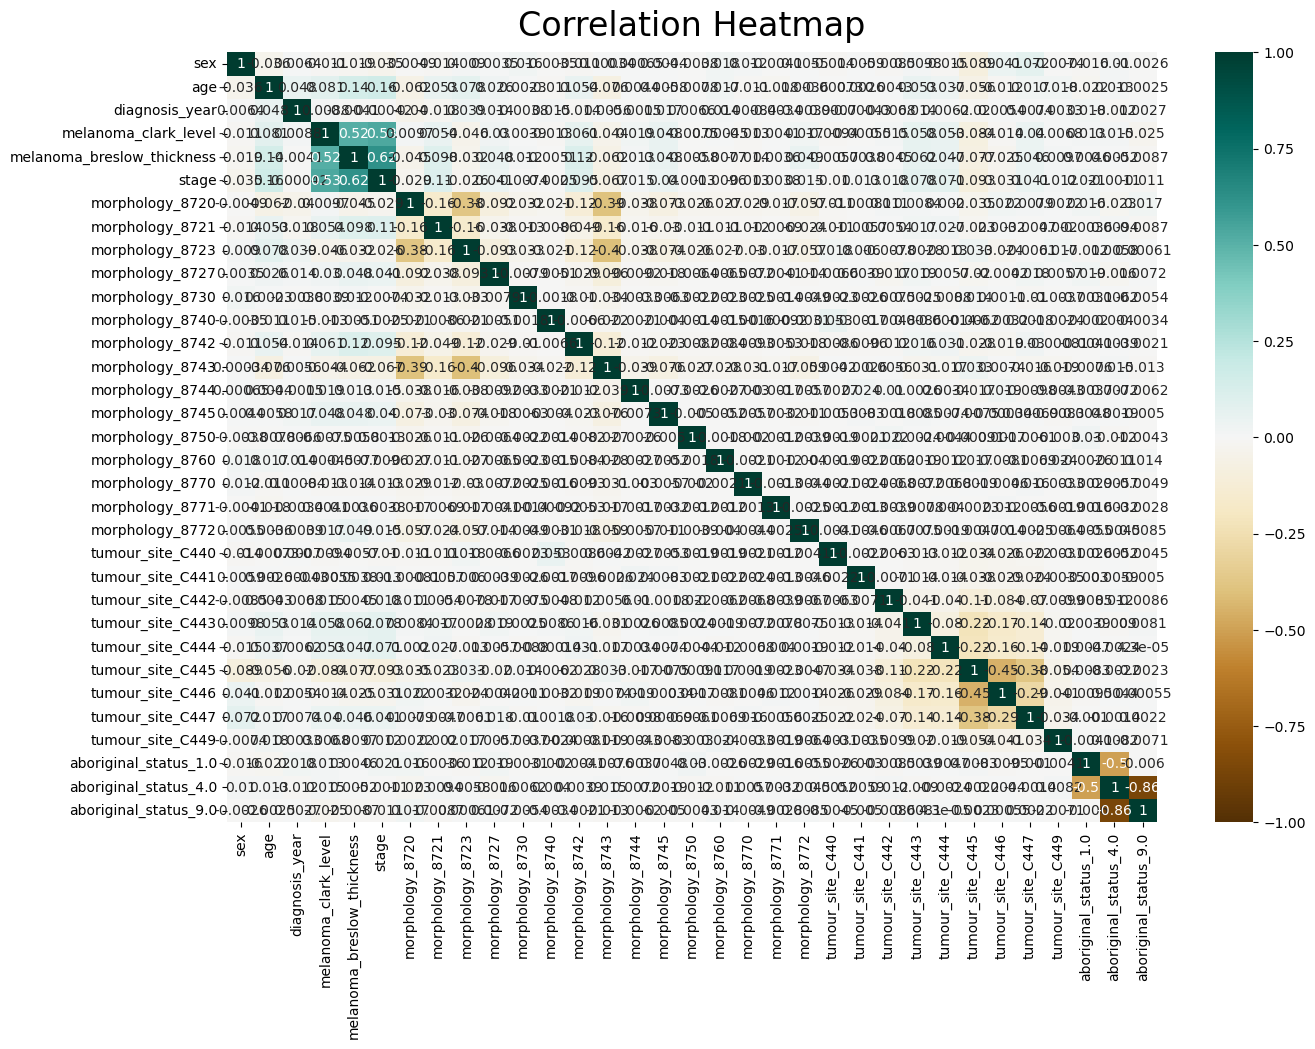

In [9]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':24}, pad=12);


# Models

## Data Prep

In [10]:
X = data[['melanoma_clark_level', 'melanoma_breslow_thickness']]
Y = data['stage']

In [11]:
X.head()

,melanoma_clark_level,melanoma_breslow_thickness
2,4.0,1.73
3,3.0,0.61
4,3.0,0.80
5,2.0,0.24
6,2.0,0.26


In [12]:
Y.head()

2    2
3    1
4    1
5    1
6    1
Name: stage, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=123, stratify=Y)

diagnosis_counts = data['stage'].value_counts()

print(diagnosis_counts)


1    10124
2     2074
Name: stage, dtype: int64


In [14]:
def get_best_clf(clf, param_grid, X_train, y_train, X_test, y_test, model_name):

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Create the cross-validator object with random_state
    cv = KFold(n_splits=3, random_state=21, shuffle=True)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(clf, param_grid, cv=cv)
    grid_search.fit(X_train, y_train)

    # Print the best hyperparameters found
    print("Best Hyperparameters:", grid_search.best_params_)

    # Train the decision tree classifier with the best hyperparameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Evaluate the model on the training set
    accuracy_train = best_model.score(X_train, y_train)
    print("\nAccuracy of the {} model (training): {:.2f}%".format(model_name, accuracy_train * 100))

    # Evaluate the model on the test set
    accuracy_test = best_model.score(X_test, y_test)
    print("Accuracy of the {} model (testing): {:.2f}%".format(model_name, accuracy_test * 100))


    return accuracy_train, accuracy_test, best_model


## Log Reg

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model with specified hyperparameters
logreg = LogisticRegression(C=0.1, class_weight='balanced', max_iter=10000, penalty='l2', solver='liblinear')

# Train the model
logreg.fit(X_train_scaled, Y_train)

# Predict on the training set
train_predictions = logreg.predict(X_train_scaled)
accuracy_train = accuracy_score(Y_train, train_predictions)

# Predict on the testing set
test_predictions = logreg.predict(X_test_scaled)
accuracy_test = accuracy_score(Y_test, test_predictions)

# Print accuracy scores
print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Testing Set:", accuracy_test)


Accuracy on Training Set: 0.9431905864197531
Accuracy on Testing Set: 0.9327868852459016


In [16]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define class weights based on the class distribution
# class_weights = {
#     1: 1,  # Adjust weights based on your specific class distribution
#     2: 5,  # Assign a higher weight to underrepresented classes
#     3: 15,
#     4: 50
# }

# # Create a logistic regression model with specified class weights and hyperparameters
# logreg = LogisticRegression(C=0.1, class_weight=class_weights, max_iter=10000, penalty='l2', solver='liblinear')

# # Train the model
# logreg.fit(X_train_scaled, Y_train)

# # Predict on the training set
# train_predictions = logreg.predict(X_train_scaled)
# accuracy_train = accuracy_score(Y_train, train_predictions)

# # Predict on the testing set
# test_predictions = logreg.predict(X_test_scaled)
# accuracy_test = accuracy_score(Y_test, test_predictions)

# # Print accuracy scores
# print("Accuracy on Training Set:", accuracy_train)
# print("Accuracy on Testing Set:", accuracy_test)


In [17]:
# # smote

# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from imblearn.over_sampling import SMOTE

# # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, Y_train_resampled = smote.fit_resample(X_train_scaled, Y_train)

# # Create a logistic regression model with specified hyperparameters
# logreg = LogisticRegression(C=0.1, max_iter=10000, penalty='l2', solver='liblinear')

# # Train the model with resampled data
# logreg.fit(X_train_resampled, Y_train_resampled)

# # Predict on the training set
# train_predictions = logreg.predict(X_train_scaled)
# accuracy_train = accuracy_score(Y_train, train_predictions)

# # Predict on the testing set
# test_predictions = logreg.predict(X_test_scaled)
# accuracy_test = accuracy_score(Y_test, test_predictions)

# # Print accuracy scores
# print("Accuracy on Training Set:", accuracy_train)
# print("Accuracy on Testing Set:", accuracy_test)


In [18]:
print(len(X_test_scaled))
print(len(test_predictions))
print(len(Y_test))

1830
1830
1830


Accuracy: 0.9327868852459016
Precision: 0.9409582384377748
Recall: 0.9327868852459016
F1-score: 0.9352317900982853
Confusion Matrix (Array):
[[1425   94]
 [  29  282]]


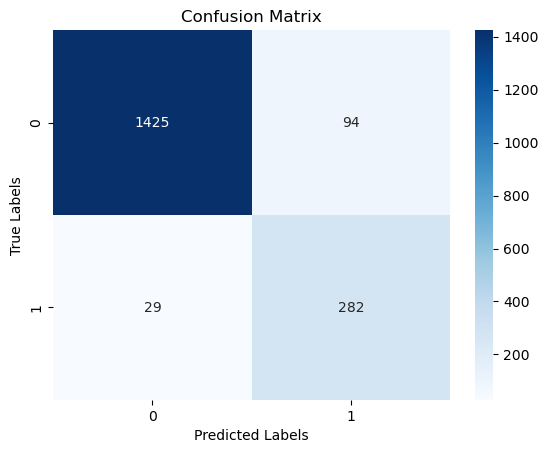

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the testing set
test_predictions = logreg.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(Y_test, test_predictions)
precision = precision_score(Y_test, test_predictions, average='weighted')
recall = recall_score(Y_test, test_predictions, average='weighted')
f1 = f1_score(Y_test, test_predictions, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, test_predictions)
print("Confusion Matrix (Array):")
print(conf_matrix)

# Visualize the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


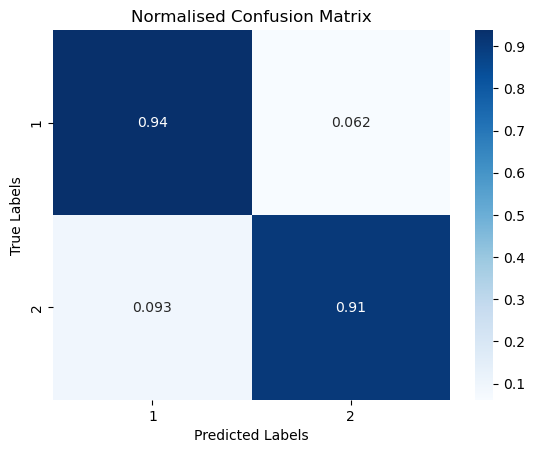

In [20]:
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Create a heatmap with labels 1 and 2
sns.heatmap(normalized_conf_matrix, annot=True, cmap='Blues', xticklabels=[1, 2], yticklabels=[1, 2])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalised Confusion Matrix')
plt.show()


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import ipywidgets as widgets
from IPython.display import display



In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import ipywidgets as widgets
from IPython.display import display

# Function to predict cancer stage with probability estimates as percentages
def predict_cancer_stage(clarke_score, breslow_score):
    # Standardize input scores
    input_data = scaler.transform([[clarke_score, breslow_score]])
    # Predict cancer stage with probabilities
    probabilities = logreg.predict_proba(input_data)[0] * 100  # Multiply by 100 to convert to percentages
    # Get the class labels
    classes = logreg.classes_
    # Create a dictionary with class labels and corresponding probabilities as percentages
    class_probabilities = dict(zip(classes, probabilities))
    return class_probabilities

# Create interactive widgets with custom style
style = {'description_width': 'initial'}  # Set description width to show full names
clarke_score_input = widgets.FloatText(description='Clarke Score:', style=style, layout=widgets.Layout(width='400px'))
breslow_score_input = widgets.FloatText(description='Breslow Score:', style=style, layout=widgets.Layout(width='400px'))
output = widgets.Output()

# Function to handle widget interaction
def on_button_click(b):
    with output:
        class_probabilities = predict_cancer_stage(clarke_score_input.value, breslow_score_input.value)
        for stage, probability in class_probabilities.items():
            print(f'Probability of Stage {stage}: {probability:.2f}%')

# Create a button widget
button = widgets.Button(description='Predict')

# Attach function to button click event
button.on_click(on_button_click)

# Display widgets
display(clarke_score_input, breslow_score_input, button, output)

FloatText(value=0.0, description='Clarke Score:', layout=Layout(width='400px'), style=DescriptionStyle(descrip…

FloatText(value=0.0, description='Breslow Score:', layout=Layout(width='400px'), style=DescriptionStyle(descri…

Button(description='Predict', style=ButtonStyle())

Output()